# EV Market Trends and Forecast: Tesla vs. BYD (2018–2025)
### Data Exploration and Analysis

This project examines the trends in the electric vehicle (EV) market, with a particular focus on two companies: Tesla and BYD. The demand for EVs is rising, so the competition between the two biggest producers is also increasing. Interestingly, the political relations between the two countries to which these companies belong — the US and China — are frequently described in the media as a trade war. With the tariffs and counter-tariffs, the topic of the transition to electric vehicles is very relevant nowadays.

The project consists of several parts, which cover different aspects of the EV landscape and competition between Tesla and BYD in particular. While Tesla is a well-known producer of battery-electric vehicles for over a decade, BYD's transition into EV production is more recent.

#### Part 1 – Comparing BEV Sales (Tesla vs. BYD)
In this part, the quarterly sales of BEVs (battery electric vehicles) produced by the two companies will be compared. The period of 2018–2025 covers a number of significant events, such as the COVID pandemic, tariff changes, surge in EV demand, and the US presidential elections of 2024.

#### Part 2 – BYD’s Transition from ICE/EV to EV
After the basic comparison in sales, the focus will be shifted towards BYD and its transition to the production of exclusively EVs, with major scaling of volumes. This part will show how the company moved away from traditional internal combustion engines and became a serious competitor to Tesla.

#### Part 3 – Global Trend in Adoption of EVs
This part will explore the wider context and provide a picture of global trends for electric vehicles. Based on the data from the International Energy Agency (IEA), the performance of Tesla and BYD will be compared to global tendencies in the development of the technology.

#### Part 4 – Stock Market Trends
With data from Yahoo Finance, the stock market performance of Tesla and BYD will be explored. This section will help understand whether their growing sales and market share translate to financial gains and investor interest.

#### Part 5 – Conclusion
This part will briefly summarize the key findings from the previous parts. It will highlight how both companies performed over the years, how BYD managed to scale up its EV production, and how these trends fit into the global picture.

#### Part 6 – Forecasting the Future of BEV Sales with Machine Learning Models
Presented in a separate notebook, machine learning models will be used to forecast BEV sales. Time series forecasting will help explore future trends for both companies based on historical sales data.

#### Part 7 – Tableau Presentation of the Findings
The final part includes a Tableau dashboards that summarize and visualizes the key findings.

In [3]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

import yfinance as yf


In [5]:
df = pd.read_csv("/Users/alex/Documents/Work/Projects for portfolio/EV Stocks and Sales/IEA Global EV Data 2024.csv")
df.shape

(12654, 8)

## 1. Comparing BEV Sales (Tesla vs. BYD)

In this part, I will compare quarterly sales of battery electric vehicles of Tesla vs. BYD from 2018 to the first quarter of 2025. As there is no publicly available, well-organized open source datasets, I turn to Wikipedia and extract the tables from two pages:
- https://en.wikipedia.org/wiki/History_of_Tesla,_Inc.
- https://en.wikipedia.org/wiki/BYD_Auto

Both pages contain tables with quarterly sales. Data originates from the public announcements of Tesla and BYD that are published on https://ir.tesla.com/#quarterly-disclosure and https://www.bydglobal.com/en/InvestorNotice.html, respectively. The data was checked manually and may be considered authentic.

#### 1.1. Data Extraction and Cleaning

I will start with BYD. I open the page with pandas and inspect the tables.

In [10]:
# Read all tables from the page
tables_byd = pd.read_html("https://en.wikipedia.org/wiki/BYD_Auto#Sales")

# Inspect which table is the one to work with
# for i, table in enumerate(tables):
#     print(f"Table {i}:")
#     print(table.head(), "\n")

After inspecting the printout, I identified the Table 6 as one that contains sales data.

In [12]:
# Select table 6
sales_byd = tables_byd[6]
sales_byd.columns

Index(['Quarter', 'ICE', 'PHEV', 'BEV', 'BEV buses & trucks', 'Total'], dtype='object')

The table that was extracted doesn't contain the data for the first quarter of 2025, like the table from Tesla. I will add this row manually, taking data from the [Latest Announcements](https://www.bydglobal.com/en/InvestorNotice.html) section on bydglobal.com. In the [file](https://www.bydglobal.com/sitesresources/common/tools/generic/web/viewer.html?file=%2Fsites%2FSatellite%2FBYD%20PDF%20Viewer%3Fblobcol%3Durldata%26blobheader%3Dapplication%252Fpdf%26blobkey%3Did%26blobtable%3DMungoBlobs%26blobwhere%3D1638928498696%26ssbinary%3Dtrue) VOLUNTARY ANNOUNCEMENT PRODUCTION AND SALES VOLUME FOR MARCH 2025, I will collect data from Sales Volume, Year-to-date, March 2025, and add it to the data frame.

In [14]:
# Create and add a new row to sales_table_byd
new_row = pd.DataFrame([{'Quarter': 'Q1 2025', 'ICE': 0, 'PHEV': 569710, 'BEV': 416388,	'BEV buses & trucks': 14706, 'Total': 1000804}])
sales_byd = pd.concat([sales_byd, new_row], ignore_index = True)
sales_byd.tail(2)

,Quarter,ICE,PHEV,BEV,BEV buses & trucks,Total
27,Q4 2024,0,918556,595413,10301,1524270
28,Q1 2025,0,569710,416388,14706,1000804


The quarterly data is complete. In the next step, I will split the original column *Quarter* into two to be able to use both features later. Additionally, I will rearrange the columns.

In [16]:
# Split Quarter in two columns
sales_byd[['Quarter_Label', 'Year']]= sales_byd['Quarter'].str.split(' ', expand=True)
sales_byd['Year'] = sales_byd['Year'].astype(int)
# Drop the initial Quarter column
sales_byd = sales_byd.drop('Quarter', axis=1)
# Rearrange the columns
sales_byd = sales_byd[['Year', 'Quarter_Label', 'ICE', 'PHEV', 'BEV', 'BEV buses & trucks', 'Total']]
sales_byd.tail()

,Year,Quarter_Label,ICE,PHEV,BEV,BEV buses & trucks,Total
24,2024,Q1,0,324284,300114,1865,626263
25,2024,Q2,0,556708,426039,3973,986720
26,2024,Q3,0,685830,443426,5636,1134892
27,2024,Q4,0,918556,595413,10301,1524270
28,2025,Q1,0,569710,416388,14706,1000804


The dataframe for BYD sales is ready for analysis. I will create the dataframe for Tesla next, using similar steps.
I will start with identifying the table using pandas *.read_html()*

In [18]:
# Read all tables from the page
tables_tesla = pd.read_html("https://en.wikipedia.org/wiki/History_of_Tesla,_Inc.#Timeline_of_production_and_sales")

# Inspect which table is the one to work with
# for i, table in enumerate(tables):
#     print(f"Table {i}:")
#     print(table.head(), "\n")

After inspecting the printout, I identified Table 5 as one that contains sales data.

In [20]:
# Select table 5
sales_tesla = tables_tesla[5]
sales_tesla.head(2)

,Quarter,Cumulative production,Total production,Roadster sales[a],Model S sales,Model X sales,Model 3 sales,Model Y sales[b],Total sales[c],In transit[d],Source
0,Q1 2011,NaN,NaN,145.0,NaN,NaN,NaN,NaN,145,NaN,[191]
1,Q2 2011,NaN,NaN,190.0,NaN,NaN,NaN,NaN,190,NaN,[191]


The dataframe contains relatively detailed data with sales broken down by model. Since Tesla focuses exclusively on BEV production, I will select only the columns with year, quarter, and total sales. I will also filter the data by year and rename a column *Total sales[c]*

In [22]:
# Split Quarter in two columns
sales_tesla[['Quarter_Label', 'Year']]= sales_tesla['Quarter'].str.split(' ', expand=True)
sales_tesla['Year'] = sales_tesla['Year'].str.extract(r'(\d{4})').astype(int)
# Filter to selected columns
sales_tesla = sales_tesla[['Year', 'Quarter_Label', 'Total sales[c]']]
# Filter by year
sales_tesla = sales_tesla[sales_tesla['Year'].astype(int) >= 2018].reset_index(drop=True)
# Change the Total sales[c] data type
sales_tesla['Total sales[c]'] = sales_tesla['Total sales[c]'].astype(int)
# Rename Total Sales
sales_tesla = sales_tesla.rename(columns={'Total sales[c]': 'Total_Sales'})
sales_tesla.tail()

,Year,Quarter_Label,Total_Sales
24,2024,Q1,386810
25,2024,Q2,443956
26,2024,Q3,462890
27,2024,Q4,495570
28,2025,Q1,336681


With both Tesla and BYD data frames cleaned and filtered, I now merge them into a single data frame that shows quarterly BEV sales for both companies.

In [24]:
# Filter the BYD data for merging
sales_byd_bev = sales_byd[['Year', 'Quarter_Label', 'BEV']]

# Merge dataframes
sales_tesla_byd = pd.merge(sales_tesla, sales_byd_bev, on=['Year', 'Quarter_Label'], how = 'left')
print(sales_tesla_byd.shape)
print(sales_tesla_byd.columns)

(29, 4)
Index(['Year', 'Quarter_Label', 'Total_Sales', 'BEV'], dtype='object')


Finally, I will rename the columns with sales data accordingly and print the data frame out.

In [26]:
# Rename the columns
sales_tesla_byd = sales_tesla_byd.rename(columns={
    'Total_Sales': 'Tesla_Sales',
    'BEV': 'BYD_Sales'})
sales_tesla_byd

,Year,Quarter_Label,Tesla_Sales,BYD_Sales
0,2018,Q1,29997,5315
1,2018,Q2,40740,18525
2,2018,Q3,83725,30091
3,2018,Q4,90700,49332
4,2019,Q1,63000,45487
5,2019,Q2,95200,50292
6,2019,Q3,97186,27879
7,2019,Q4,112095,23527
8,2020,Q1,88496,18110
9,2020,Q2,90891,28151


#### 1.2. Exploratory Data Analysis (Visualizations)

As we can see, the data is quite compact: it shows quarterly BEV sales for both Tesla and BYD, with volumes generally increasing over time. In the next step, I will create a line plot to visualize this trend. Before plotting, I will convert the available time data into a timestamp format.

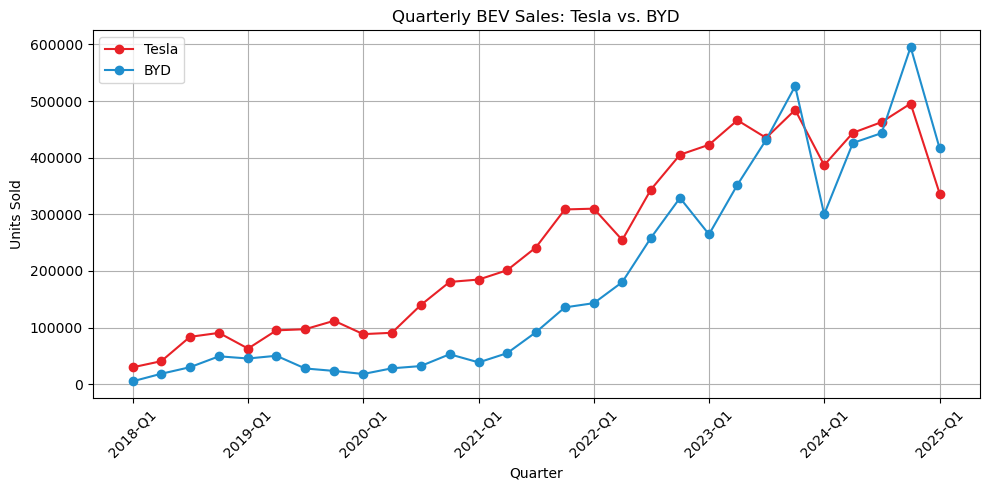

In [29]:
# Create a combined 'Date' column for the x-axis
sales_tesla_byd['Date'] = sales_tesla_byd['Year'].astype(str) + sales_tesla_byd['Quarter_Label']
sales_tesla_byd['Date'] = pd.PeriodIndex(sales_tesla_byd['Date'], freq='Q').to_timestamp()


# Plot
plt.figure(figsize=(10, 5))
plt.plot(sales_tesla_byd['Date'], sales_tesla_byd['Tesla_Sales'], label='Tesla', c = '#E82127', marker = 'o')
plt.plot(sales_tesla_byd['Date'], sales_tesla_byd['BYD_Sales'], label='BYD', c = '#1F8ECD', marker = 'o')
plt.title('Quarterly BEV Sales: Tesla vs. BYD')
plt.xlabel('Quarter')
plt.ylabel('Units Sold')
# Format x-ticks to show year and quarter
plt.xticks(sales_tesla_byd['Date'][::4], 
           [f'{d.year}-Q{((d.month - 1)//3 + 1)}' for d in sales_tesla_byd['Date'][::4]], 
           rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The plot shows that sales have risen significantly over the past seven years, with a notably stronger growth trend starting after the second quarter of 2020. Then, Tesla nearly doubled its quarterly sales. In contrast, BYD's sales grew more slowly, likely due to stricter COVID-19 restrictions in China, which appear to have limited its expansion.

Both companies saw consistent sales growth throughout 2021 and 2022. Starting in Q2 2022, BYD experienced rapid growth that continued through the end of 2023, with the exception of Q1 2023, when sales temporarily declined. However, both Q1 2024 and Q1 2025 saw a significant drop in BYD's sales, while the remaining quarters continued to show strong upward momentum.

Tesla's sales continued to grow steadily until the end of 2023, but showed little further increase through 2024. In Q1 2025, both Tesla and BYD reported a sharp decline in BEV sales. A seasonal dip in Q1 is also noticeable, recurring for BYD between 2023 and 2025, and for Tesla in 2024 and 2025.

By the end of 2023, BYD had overtaken Tesla in quarterly BEV sales for the first time. In Q4 2024, this gap had widened to approximately 100,000 vehicles in BYD’s favor.

To understand the broader trend, the bar plot below shows the annual BEV sales for Tesla and BYD.

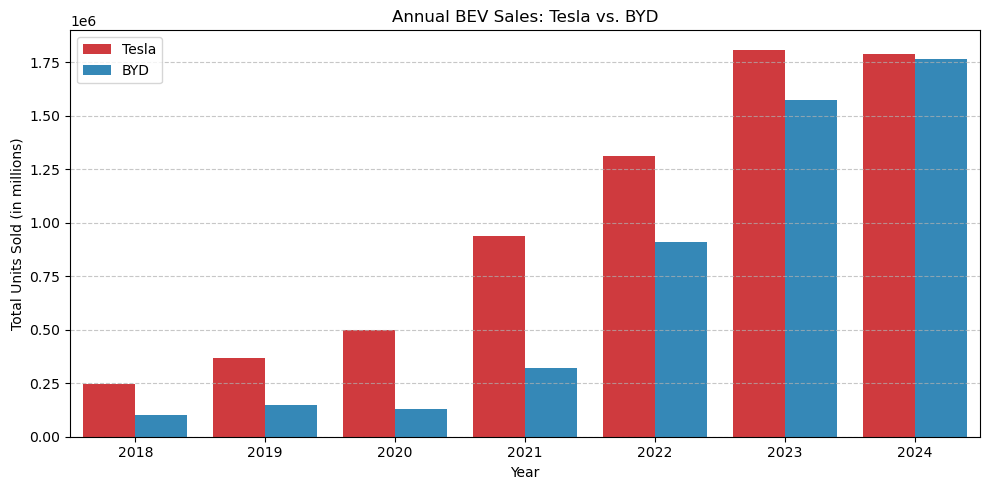

In [32]:
# Group by year
yearly_sales = sales_tesla_byd[['Year', 'Tesla_Sales', 'BYD_Sales']].groupby('Year').sum().reset_index()
# Convert from wide to long format
df_long = pd.melt(yearly_sales, id_vars=['Year'], value_vars=['Tesla_Sales', 'BYD_Sales'], var_name='Brand', value_name='Sales')
df_long['Brand'] = df_long['Brand'].replace({'Tesla_Sales': 'Tesla', 'BYD_Sales': 'BYD'})
# Limit to full year 
df_long = df_long[df_long['Year'] < 2025]
# Set the palette
palette = {'Tesla': '#E82127', 'BYD': '#1F8ECD'}
# Plot
plt.figure(figsize=(10, 5))
sns.barplot(data=df_long, x='Year', y='Sales', hue='Brand', palette=palette)
plt.title('Annual BEV Sales: Tesla vs. BYD')
plt.xlabel('Year')
plt.ylabel('Total Units Sold (in millions)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.legend(title='')
plt.tight_layout()
plt.show()

We observe that from 2018 to 2020, Tesla’s sales steadily grew, while BYD’s sales even declined in 2020. Starting in 2021, both companies experienced significant year-over-year growth. Between 2021 and 2023, BYD’s annual sales increased rapidly, with figures of year-over-year growth above 500,000 BEVs. In 2024, Tesla still led in total sales, but the gap between the two companies was the narrowest since 2018, highlighting the intensifying competition.

In [34]:
sales_tesla_byd.to_csv('/Users/alex/Documents/Work/Projects for portfolio/EV Stocks and Sales/sales_tesla_byd.csv')

#### 1.3. Findings from Predictive Modelling

To explore the growth in sales volumes further, I used the Prophet model as a baseline. The full process is detailed in the Predictive Modelling notebook. Setting the prediction target to Q2, Q3, and Q4 of 2025, the model forecasts steady growth in quarterly sales for both Tesla and BYD. It fits Tesla’s sales data more closely, while BYD’s data shows higher variability and wider uncertainty intervals, reflecting less stable sales patterns. This confirms the trends observed earlier in the line plot Quarterly BEV Sales: Tesla vs. BYD.

Although the data is limited, Prophet provided useful insights and highlighted the challenges of forecasting in this fast-evolving market. While the overall BEV market may be influenced by factors like supply chain changes, tariffs, and geopolitics, the competition between Tesla and BYD will be examined further in this project. Given the more volatile nature of BYD’s sales volumes, the next part briefly explores BYD’s transition from producing a mix of ICE cars and EVs to focusing exclusively on EVs.

## 2. BYD’s Transition from ICE/EV to EV

In the previous part, we explored the rise in BEV sales by Tesla and BYD from 2018 to 2025, along with the intensifying competition between the two companies. Tesla has long focused exclusively on battery electric vehicles (BEVs), firmly positioning itself in the fully electric market.

BYD, by contrast, initially served a broader market and offered a variety of powertrains. However, in the early 2020s, the company underwent a significant transition: it ceased production of internal combustion engine (ICE) vehicles and rapidly expanded its production of new energy vehicles (NEVs), namely BEVs and plug-in hybrid electric vehicles (PHEVs).

In the following section, I will examine BYD’s quarterly and yearly sales by powertrain type over the 2018–2025 period to illustrate this transition and highlight the company’s evolving sales strategy.

I will begin by exploring the dataset of BYD sales, which was extracted from Wikipedia in the previous chapter.

In [39]:
sales_byd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year                29 non-null     int64 
 1   Quarter_Label       29 non-null     object
 2   ICE                 29 non-null     int64 
 3   PHEV                29 non-null     int64 
 4   BEV                 29 non-null     int64 
 5   BEV buses & trucks  29 non-null     int64 
 6   Total               29 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 1.7+ KB


The full BYD sales dataset extracted from Wikipedia includes not only the quarterly volumes for BEVs, but also for PHEVs, BEV buses and trucks, and ICE vehicles. The data spans 29 quarters, covering the period from Q1 2018 to Q1 2025.

To prepare the data for visualization, I will first create a datetime feature called Date.

In [41]:
sales_byd['Date'] = sales_byd['Year'].astype(str) + sales_tesla_byd['Quarter_Label']
sales_byd['Date'] = pd.PeriodIndex(sales_byd['Date'], freq='Q').to_timestamp()
sales_byd.columns

Index(['Year', 'Quarter_Label', 'ICE', 'PHEV', 'BEV', 'BEV buses & trucks',
       'Total', 'Date'],
      dtype='object')

Now, I will proceed directly to a line plot to visualize the quarterly sales by powertrain type. Since BEV buses and trucks represent a niche segment and have a limited impact on the overall trend, I will exclude them from the next plot, comparing only BEV, PHEV, and ICE car sales.

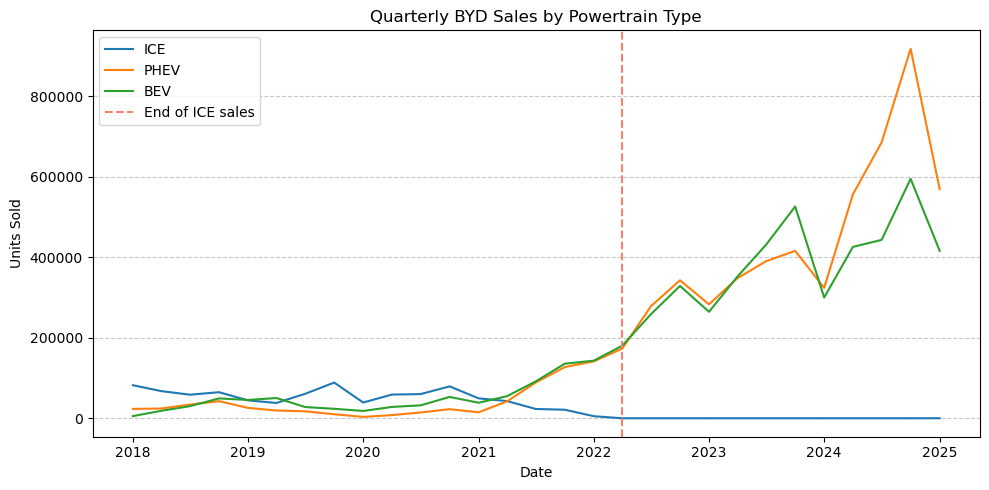

In [43]:
plt.figure(figsize=(10, 5))

# Plot each powertrain type
for col in ['ICE', 'PHEV', 'BEV']:
    plt.plot(sales_byd['Date'], sales_byd[col], label=col)

# Add the vertical line for the end of ICE sales
ice_end_date = sales_byd.loc[sales_byd['ICE'] == 0, 'Date'].iloc[0]
plt.axvline(x=ice_end_date, color='salmon', linestyle='--', label='End of ICE sales')

# Plot formatting
plt.legend()
plt.title('Quarterly BYD Sales by Powertrain Type')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

While we already observed the growth in BEV sales in the previous part, this view provides a broader picture of BYD’s transition across all powertrain types. Until Q1 2021, ICE vehicles accounted for the largest share of BYD’s quarterly sales. However, starting from Q4 2020, ICE sales began to decline sharply and eventually dropped to zero in Q2 2022, following the company’s official announcement to cease production of internal combustion engine cars.

At the same time, sales of BEVs and PHEVs began to rise steadily from Q1 2021 onward. Despite what appears to be seasonal dips in the first quarters of 2023, 2024, and 2025, total sales volumes continued to grow significantly over the entire period.

Looking specifically at 2024, while BEV sales saw moderate growth compared to the previous year, PHEV sales more than doubled. The next plot will explore this yearly dynamic in more detail.

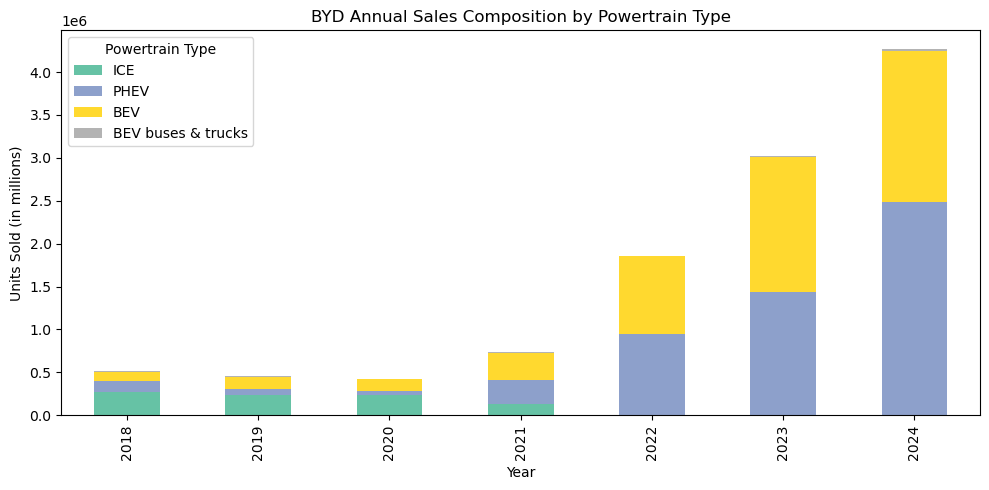

In [45]:
# Filter to full years
sales_byd_full_years = sales_byd[sales_byd['Year']<2025]

# Aggregate quarterly data by year
sales_byd_yearly = sales_byd_full_years.groupby('Year')[['ICE', 'PHEV', 'BEV', 'BEV buses & trucks']].sum()

# Plot stacked barplot
ax = sales_byd_yearly.plot(kind='bar', stacked=True, figsize=(10, 5), cmap='Set2')

# Formatting
plt.title('BYD Annual Sales Composition by Powertrain Type')
plt.xlabel('Year')
plt.ylabel('Units Sold (in millions)')
plt.legend(title='Powertrain Type')
plt.tight_layout()
plt.show()

The stacked barplot above illustrates BYD's strategic transition over recent years. Notably, 2021 marked the final year of significant ICE vehicle sales, with production fully discontinued by Q2 2022. From that point onward, the company experienced explosive growth in electric vehicle (EV) sales, with volumes rising sharply through 2023 and 2024.

By 2024, BYD's total vehicle sales exceeded 4 million units, with PHEVs accounting for nearly 60% of those, underscoring their key role in the company’s electrification strategy.

While Tesla and BYD can only be directly compared in the BEV segment, examining the broader context provides valuable insights into the diversification and scale of BYD’s growth. PHEV sales, though not fully electric, remain important. They not only contribute significantly to BYD’s revenue but also represent a transitional technology, blending traditional fuel capabilities with advancements in battery-powered driving. This dual functionality helps ease consumers into the EV ecosystem, particularly in regions where charging infrastructure is still developing.

In the following section, I will analyze Tesla and BYD’s sales in the context of global EV adoption trends, using data sourced from the International Energy Agency (IEA). This analysis will provide a broader perspective on how each brand’s growth aligns with worldwide developments.

## 3. Global Trend in Adoption of EVs

To better understand the dynamics behind Tesla and BYD’s EV sales, I will explore the __Global EV Outlook 2025__ dataset ([IEA report](https://www.iea.org/reports/global-ev-outlook-2025)), an annual publication by the International Energy Agency that tracks developments in electric mobility worldwide. Following the brand-level sales volumes analyzed earlier, this part aims to expand the context and enhance predictive accuracy.

There are two main objectives:
- To explore the broader market environment in which Tesla and BYD operate by comparing their performance against global trends.
- To examine the IEA dataset for potential features that can improve the accuracy of brand-level sales forecasts.

I will begin with a formal exploration of the dataset’s structure.

In [49]:
df_iea = pd.read_excel('/Users/alex/Documents/Work/Projects for portfolio/EV Stocks and Sales/EVDataExplorer2025.xlsx')
df_iea.head()

,region_country,category,parameter,mode,powertrain,year,unit,value,Aggregate group
0,World,Projection-STEPS,EV stock,2 and 3 wheelers,BEV,2030,Vehicles,170000000.0,_World
1,World,Projection-STEPS,EV stock,Cars,BEV,2030,Vehicles,150000000.0,_World
2,China,Projection-STEPS,EV stock,2 and 3 wheelers,BEV,2030,Vehicles,91000000.0,Other
3,China,Projection-STEPS,EV stock,Cars,BEV,2030,Vehicles,82000000.0,Other
4,World,Projection-STEPS,EV stock,Cars,PHEV,2030,Vehicles,82000000.0,_World


In [50]:
df_iea.shape

(16436, 9)

In [51]:
df_iea.nunique()

region_country       63
category              2
parameter             9
mode                  6
powertrain            6
year                 16
unit                  6
value              1060
Aggregate group       4
dtype: int64

In [52]:
df_iea.dtypes

region_country      object
category            object
parameter           object
mode                object
powertrain          object
year                 int64
unit                object
value              float64
Aggregate group     object
dtype: object

In [53]:
df_iea.isna().sum()

region_country     0
category           0
parameter          0
mode               0
powertrain         0
year               0
unit               0
value              0
Aggregate group    0
dtype: int64

The dataset is complex, containing 16,436 rows across 9 features, and it has no missing values. The data is predominantly categorical, with the *value* column being the only numerical feature. The *year* column is an integer but best interpreted as categorical, representing discrete time points rather than continuous values.

The *region_country* feature offers a geographical dimension, including three levels: countries, regions, and a global aggregate. However, the country-level coverage is limited. The dataset is also structured by *powertrain* (e.g., BEV, PHEV), *mode* (e.g., Cars, 2- and 3-wheelers), and *parameter*, which includes categories like EV sales, EV stock, and others. The *category* feature distinguishes between Historical data and Projection–STEPS, the latter providing scenario-based forecasts with predicted values for the year 2030.

Given the dataset’s multidimensional nature, I will filter it down to historical data from 2018 to 2025, focusing on Cars with powertrains BEV, PHEV, and EV, and limiting the parameter field to EV sales, EV sales share, and EV stock.

In [55]:
# Filter the dataset
df_iea_h_filt = df_iea[
    (df_iea['year'].between(2018, 2025)) &
    (df_iea['category'] == 'Historical') &
    (df_iea['powertrain'].isin(['BEV', 'PHEV', 'EV'])) &
    (df_iea['parameter'].isin(['EV sales', 'EV sales share', 'EV stock'])) &
    (df_iea['mode'] == 'Cars')
]

The analysis of BYD’s sales by powertrain reveals a significant increase in PHEV sales in 2024, accounting for nearly 60% of the company’s total vehicle sales that year. To contextualize this shift, the following plot presents global yearly sales trends for BEVs and PHEVs.

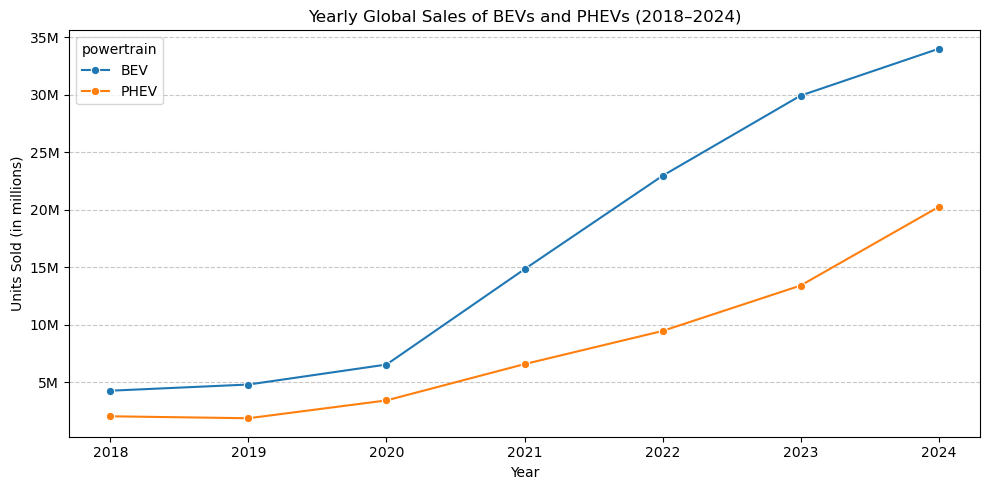

In [57]:
# Filter only EV sales data
iea_sales = df_iea_h_filt[df_iea_h_filt['parameter'] == 'EV sales']

# Group by year and powertrain, summing the sales
iea_sales_grouped = iea_sales.groupby(['year', 'powertrain'])['value'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=iea_sales_grouped, x='year', y='value', hue='powertrain', marker='o')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-6:.0f}M'))

# Formatting
plt.title('Yearly Global Sales of BEVs and PHEVs (2018–2024)')
plt.xlabel('Year')
plt.ylabel('Units Sold (in millions)')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The plot above shows that annual global BEV sales have consistently outpaced those of PHEVs. While both powertrains have seen rising adoption over time, the growth in BEV sales accelerated more sharply after 2021, whereas PHEV sales increased at a steadier pace. Notably, in 2024, PHEVs experienced a stronger year-over-year increase than BEVs, marking a shift in their recent growth trajectory.

Comparing these global figures with BYD’s sales by powertrain suggests that the company’s market strategy does not strictly follow global trends in BEV and PHEV adoption. While BYD operates on a large scale, its sales proportions differ significantly from the global average, indicating that its growth may be influenced by factors other than global market dynamics alone.

In the next plot, I will examine the global EV stock for both BEV and PHEV powertrains.

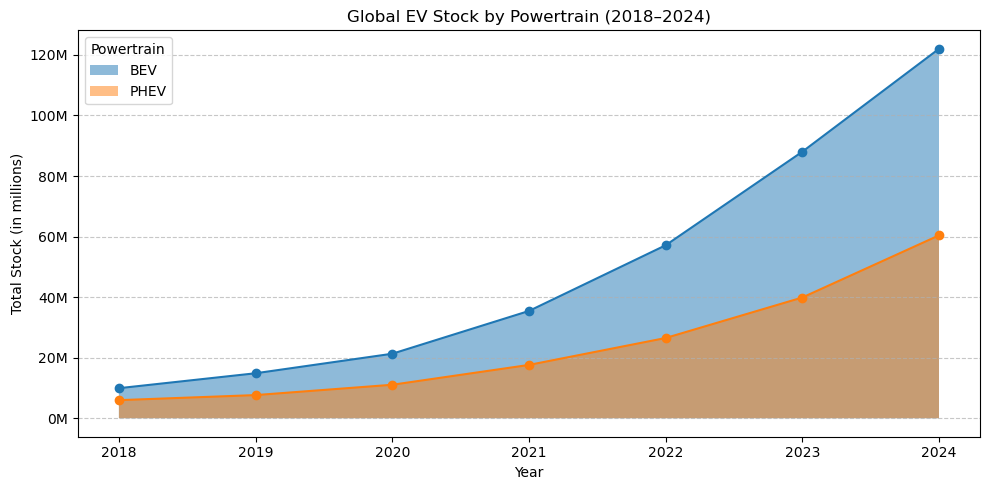

In [59]:
# Filter only EV stock data
iea_stock = df_iea_h_filt[df_iea_h_filt['parameter'] == 'EV stock']

# Group by year and powertrain, summing the stock values
iea_stock_grouped = iea_stock.groupby(['year', 'powertrain'])['value'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))

# Loop through each powertrain and plot with fill_between
for pt in iea_stock_grouped['powertrain'].unique():
    subset = iea_stock_grouped[iea_stock_grouped['powertrain'] == pt]
    plt.fill_between(subset['year'], subset['value'], alpha=0.5, label=pt)
    plt.plot(subset['year'], subset['value'], marker='o')

# Format y-axis to millions
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-6:.0f}M'))

# Formatting
plt.title('Global EV Stock by Powertrain (2018–2024)')
plt.xlabel('Year')
plt.ylabel('Total Stock (in millions)')
plt.legend(title='Powertrain')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The area plot above illustrates a steady increase in the global stock of BEVs compared to PHEVs. By the end of 2024, both categories reached approximately 60 million vehicles.

Comparing the role of BEV and PHEV powertrains in global EV sales and stock provides useful context for understanding the sales patterns of Tesla and BYD, especially when interpreting BYD’s distribution by powertrain.

EV adoption is closely linked to the availability and development of charging infrastructure. The Global EV Outlook 2025 report provides yearly data on charging points, categorized as “Publicly available fast” and “Publicly available slow” chargers.

In the next section, I will filter the dataset accordingly and create line plots to visualize how the number of these charging points has evolved over recent years.

In [62]:
# Filter the dataset
charging_points = df_iea[
    (df_iea['year'].between(2018, 2025)) &
    (df_iea['category'] == 'Historical') &
    (df_iea['powertrain'].isin(['Publicly available slow', 'Publicly available fast'])) &
    (df_iea['parameter'].isin(['EV charging points']))
]

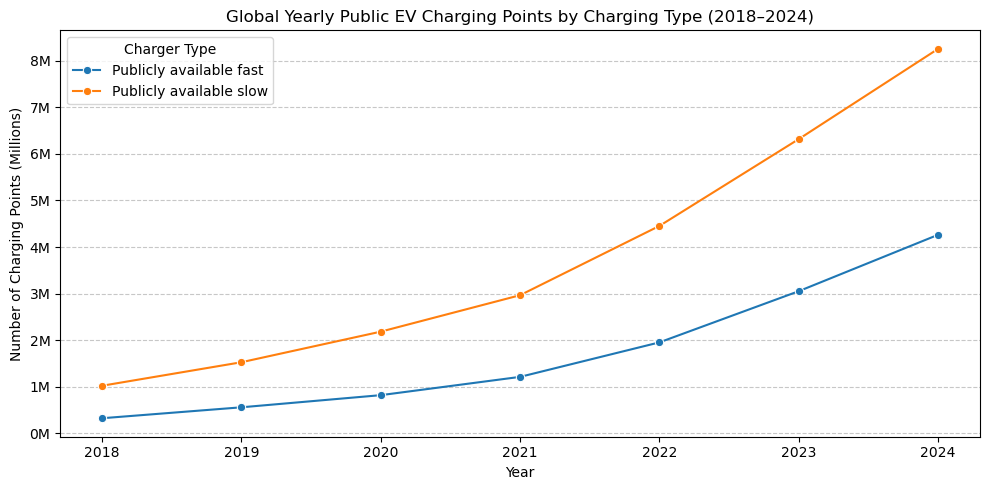

In [63]:
# Group by year and powertrain, summing the sales
charging_points_grouped = charging_points.groupby(['year', 'powertrain'])['value'].sum().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=charging_points_grouped, x='year', y='value', hue='powertrain', marker='o')
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-6:.0f}M'))

# Formatting
plt.title('Global Yearly Public EV Charging Points by Charging Type (2018–2024)')
plt.xlabel('Year')
plt.ylabel('Number of Charging Points (Millions)')
plt.legend(title='Charger Type')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

We can observe a steady increase in both types of charging stations over recent years. Notably, the number of slow charging stations is roughly twice that of fast charging stations.

To conclude this part, I will return to the sales of BEVs — the initial focus of this project. The next plot compares the yearly BEV sales of Tesla and BYD against global BEV sales, providing context for how these brands perform relative to overall market growth. This comparison will help ground the upcoming analysis and modeling efforts.

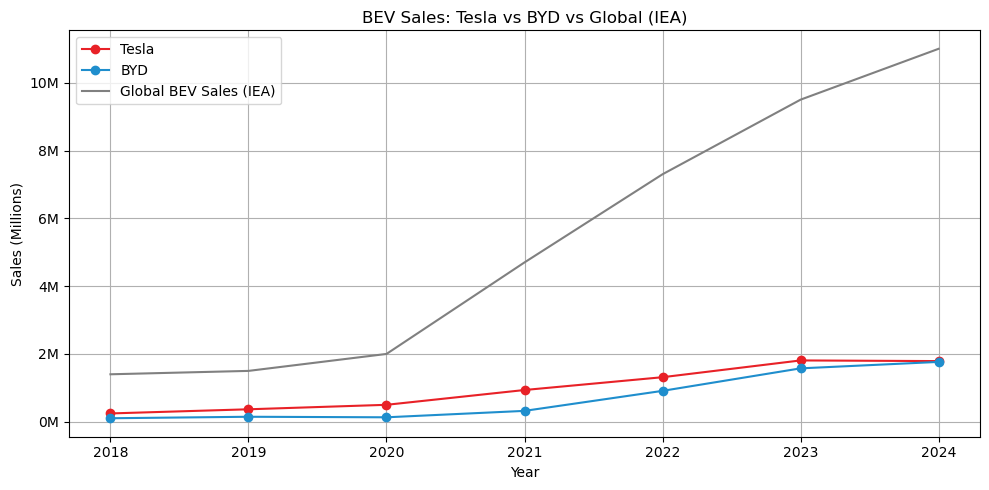

In [66]:
# Filter by the powertrain and region
iea_sales_bev = iea_sales[iea_sales['powertrain'] == 'BEV']
iea_sales_bev_world = iea_sales_bev[iea_sales_bev['region_country'] == 'World']

# Filter Tesla and BYD sales to the last full year
tesla_byd_yearly = yearly_sales[yearly_sales['Year']<2025]

# Plot the figure
plt.figure(figsize=(10, 5))

# Plot Tesla and BYD
plt.plot(tesla_byd_yearly['Year'], tesla_byd_yearly['Tesla_Sales'], label='Tesla', marker='o', color='#E82127')
plt.plot(tesla_byd_yearly['Year'], tesla_byd_yearly['BYD_Sales'], label='BYD', marker='o', color='#1F8ECD')

# Plot IEA global sales
plt.plot(iea_sales_bev_world['year'], iea_sales_bev_world['value'], label='Global BEV Sales (IEA)', color='gray')

# Format y-axis to millions
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x*1e-6:.0f}M'))

# Labels and title
plt.title('BEV Sales: Tesla vs BYD vs Global (IEA)')
plt.xlabel('Year')
plt.ylabel('Sales (Millions)')
plt.legend()
plt.grid(True) 

plt.tight_layout()
plt.show()


The line plot above highlights the significant growth in global yearly BEV sales, maintaining a strong pace over the past four years. As shown earlier, Tesla experienced a slight decline in sales, while BYD continued to grow, though at a slower rate compared to previous years. The overall global growth in BEV sales remained steady, with only a minimal slowdown compared to the previous year.

The table below presents the yearly share of Tesla and BYD sales as a percentage of global BEV sales.

In [68]:
# Filter dataframe and rename the columns
iea_sales_bev_world_short = iea_sales_bev_world[['year', 'value']]
iea_sales_bev_world_short = iea_sales_bev_world_short.rename(columns={'year':'Year', 'value':'Global_Sales'})

In [69]:
# Merge dataframes
tbg_sales = pd.merge(tesla_byd_yearly, iea_sales_bev_world_short, on=['Year'], how = 'left')

# Create percentage features
tbg_sales['Tesla_Sales_%'] = (tbg_sales['Tesla_Sales'] / tbg_sales['Global_Sales'] * 100).round(2)
tbg_sales['BYD_Sales_%'] = (tbg_sales['BYD_Sales'] / tbg_sales['Global_Sales'] * 100).round(2)
tbg_sales

,Year,Tesla_Sales,BYD_Sales,Global_Sales,Tesla_Sales_%,BYD_Sales_%
0,2018,245162,103263,1400000.0,17.51,7.38
1,2019,367481,147185,1500000.0,24.50,9.81
2,2020,499647,131330,2000000.0,24.98,6.57
3,2021,936222,320810,4700000.0,19.92,6.83
4,2022,1313851,911140,7300000.0,18.00,12.48
5,2023,1808581,1574822,9500000.0,19.04,16.58
6,2024,1789226,1764992,11000000.0,16.27,16.05


We can observe that Tesla held the largest share of the BEV market between 2018 and 2020, with its peak in 2020 (nearly 25%). However, starting in 2021, its dominance began to decline gradually. Meanwhile, BYD’s share has grown significantly since 2021, nearly matching Tesla by 2024. This shift highlights the narrowing gap between the two companies and reflects broader dynamics in the global EV market.

The Global EV Outlook 2025 report offers further opportunities for analysis and could serve as a foundation for investigating EV adoption at the regional or national level. However, since this project focuses specifically on Tesla and BYD and aims to forecast their global sales, the data explored above appears to offer the most potential both for analytical insight and predictive modeling.

In the next chapter, I will examine stock market trends for Tesla and BYD.

## 4. Stock Market Trends

This part gives a short analysis of the stock market performance of Tesla and BYD using data from Yahoo Finance. A deeper investigation would require more financial data and a broader project scope. Since the main goal here is to explore EV industry trends with a focus on these two companies and their sales volumes, I will concentrate on comparing their stock data and pointing out features that might be useful for predictive modelling.

It's important to mention that there's not always a direct link between sales numbers and stock market trends. Market performance can be shaped by many other factors — for example, overall economic shifts, company investments, geopolitical events, or even public actions of CEOs. Still, stock data can reflect investor and market sentiment, which could have an indirect impact on sales.

In this analysis, I will use the indexes TSLA and BYDDY traded on the US stock market. BYD is also traded at the Hong Kong Exchange as 1211.HK, a primary market for the Chinese company. The choice for BYDDY is made for consistency, to compare the stock's performance in the same currency, trading environment, and the same time zone. BYDDY (ADR) and 1211.HK (primary listing) are strongly correlated. While minor fluctuations may occur due to exchange rates, trading hours, or liquidity differences, their overall trends closely mirror each other.

To start, I’ll download historical stock data from yfinance and display the resulting dataframe.

In [74]:
# Define tickers
tesla = yf.Ticker("TSLA")
byd = yf.Ticker("BYDDY")

# Download historical data
tesla_stm = tesla.history(start="2018-01-01", end="2025-03-31")
byd_stm = byd.history(start="2018-01-01", end="2025-03-31")

In [75]:
tesla_stm.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2018-01-02 00:00:00-05:00,20.799999,21.474001,20.733334,21.368668,65283000,0.0,0.0
2018-01-03 00:00:00-05:00,21.400000,21.683332,21.036667,21.150000,67822500,0.0,0.0
2018-01-04 00:00:00-05:00,20.858000,21.236668,20.378668,20.974667,149194500,0.0,0.0
2018-01-05 00:00:00-05:00,21.108000,21.149332,20.799999,21.105333,68868000,0.0,0.0
2018-01-08 00:00:00-05:00,21.066668,22.468000,21.033333,22.427334,147891000,0.0,0.0


The dataframe includes a standard set of features such as the date, open, high, low, and close prices, daily trading volume, dividends, and stock splits. In this chapter, I will focus on the Close price — the stock’s value at the end of each trading day.

The following line plot shows the daily stock performance of Tesla and BYD from 2018 to Q1 2025.

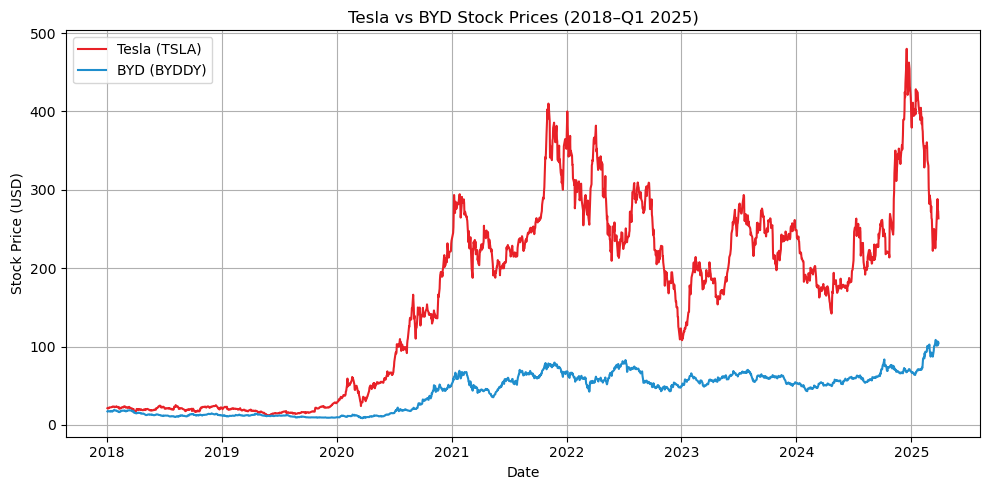

In [77]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(tesla_stm['Close'], label='Tesla (TSLA)', color='#E82127')
plt.plot(byd_stm['Close'], label='BYD (BYDDY)', color='#1F8ECD')

# Set labels and title
plt.title('Tesla vs BYD Stock Prices (2018–Q1 2025)')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The line plot above shows that Tesla has consistently outperformed BYD on the stock market, with significantly higher stock prices and likely greater fluctuations. The gap between the two stocks began to widen sharply in early 2020, possibly due to increased investor enthusiasm for Tesla during the early pandemic period, its inclusion in the S&P 500 later that year, and the general growth of tech-focused stocks.

In contrast, BYD's performance has remained more stable and less volatile. This may be due to its stronger ties to the Chinese domestic market, different investor base, and less international media presence. Tesla, on the other hand, is often in the spotlight not only for its business operations but also for its ventures into AI, energy, and space technology through affiliated companies like SpaceX and Neuralink.

Tesla’s CEO, Elon Musk, is a highly visible and polarizing figure, with known ties to the Republican Party and President Donald Trump. This public visibility can influence market sentiment. For example, the TSLA index more than doubled in the last quarter of 2024 following Trump's election win, possibly reflecting investor expectations of a more favorable regulatory environment for Tesla. The subsequent drop in early 2025 might be attributed to Musk’s controversial public statements, which have historically caused fluctuations in Tesla's stock price.

In the next step, I'll create a new dataframe and restructure the data into quarterly intervals for further analysis.

In [79]:
# Resample to quarterly, taking the mean closing price
tesla_stm_q = tesla_stm['Close'].resample('QE').mean()
byd_stm_q = byd_stm['Close'].resample('QE').mean()

# Combine into one DataFrame
stm_q = pd.DataFrame({
    'Tesla_Close': tesla_stm_q,
    'BYD_Close': byd_stm_q
})

Next, I’ll calculate the quarterly returns.

In [81]:
# Calculate quarterly return for Tesla
stm_q['Tesla_QR'] = stm_q['Tesla_Close'].pct_change()

# Calculate quarterly return for BYD
stm_q['BYD_QR'] = stm_q['BYD_Close'].pct_change()

stm_q.head()

,Tesla_Close,BYD_Close,Tesla_QR,BYD_QR
Date,,,,
2018-03-31 00:00:00-04:00,21.995268,17.735618,NaN,NaN
2018-06-30 00:00:00-04:00,20.322490,13.449723,-0.076052,-0.241655
2018-09-30 00:00:00-04:00,20.827735,11.593343,0.024861,-0.138024
2018-12-31 00:00:00-05:00,21.510392,13.126660,0.032776,0.132258
2019-03-31 00:00:00-04:00,20.074448,11.933886,-0.066756,-0.090867


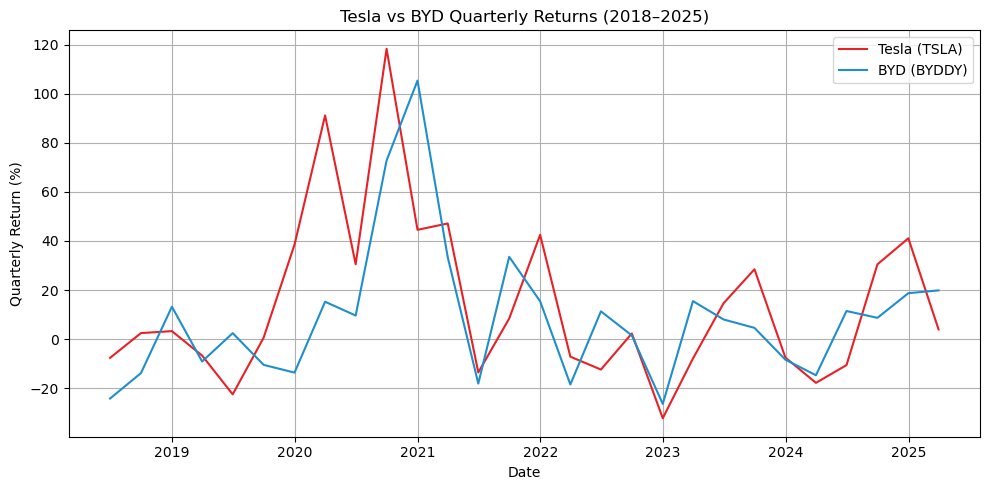

In [82]:
# Plot
plt.figure(figsize=(10, 5))
plt.plot(stm_q['Tesla_QR']*100, label='Tesla (TSLA)', color='#E82127')
plt.plot(stm_q['BYD_QR']*100, label='BYD (BYDDY)', color='#1F8ECD')

# Set labels and title
plt.title('Tesla vs BYD Quarterly Returns (2018–2025)')
plt.xlabel('Date')
plt.ylabel('Quarterly Return (%)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

The quarterly returns for both Tesla and BYD vary across the years, showing periods of growth and decline. While there are some differences, their performance often follows a similar pattern. Quarterly gains in 2020 were the highest for both companies, with Tesla showing more consistency, reaching around 90% in Q1 and nearly 120% in Q3. In the same year, BYD saw over 100% growth in Q4. Since a drop to around -20% in Q2 2021, both companies' returns fluctuated within a range of approximately -30% to 40% for Tesla, and a slightly narrower range of -20% to 30% for BYD.

The surge in quarterly returns in 2020 can be attributed to the post-COVID market rebound, growing interest in EV stocks, and strong delivery reports. Tesla especially benefited from the high investor interest and positive earnings, while BYD gained momentum as China ramped up EV support.

The next step is to calculate the 20-day rolling volatility for each quarter, which helps capture how much daily returns fluctuated over time.

In [84]:
# Calculate daily returns
tesla_stm['Daily_Return'] = tesla_stm['Close'].pct_change()
byd_stm['Daily_Return'] = byd_stm['Close'].pct_change()

# Calculate rolling volatility (std dev of returns)
tesla_stm['Rolling_Volatility'] = tesla_stm['Daily_Return'].rolling(window=20).std()
byd_stm['Rolling_Volatility'] = byd_stm['Daily_Return'].rolling(window=20).std()

# Resample to quarterly average volatility
tesla_vol_q = tesla_stm['Rolling_Volatility'].resample('QE').mean()
byd_vol_q = byd_stm['Rolling_Volatility'].resample('QE').mean()

# Add to your quarterly summary dataframe
stm_q['Tesla_Volat'] = tesla_vol_q
stm_q['BYD_Volat'] = byd_vol_q

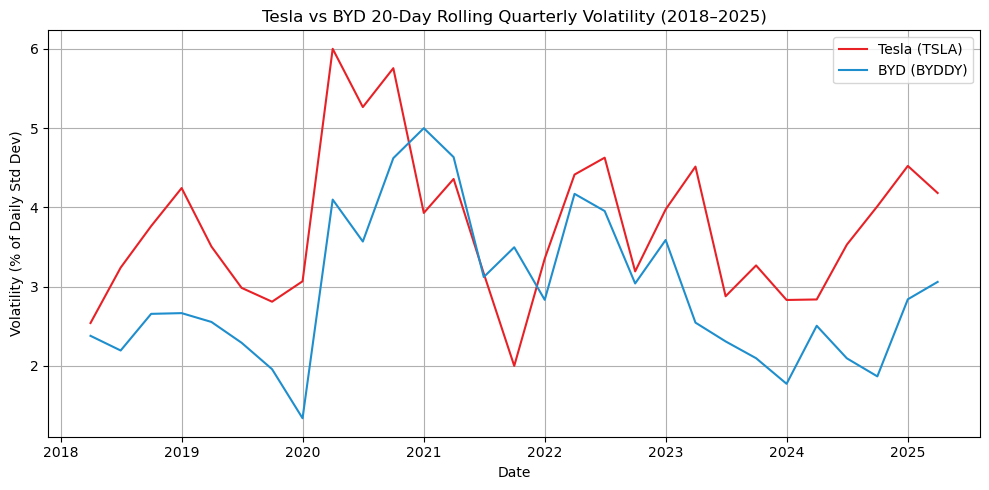

In [85]:
#Plot
plt.figure(figsize=(10, 5))
plt.plot(stm_q['Tesla_Volat']*100, label='Tesla (TSLA)', color='#E82127')
plt.plot(stm_q['BYD_Volat']*100, label='BYD (BYDDY)', color='#1F8ECD')

# Set labels and title
plt.title('Tesla vs BYD 20-Day Rolling Quarterly Volatility (2018–2025)')
plt.xlabel('Date')
plt.ylabel('Volatility (% of Daily Std Dev)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

For the 20-day rolling volatility per quarter, we can observe fluctuations within a 6% range of daily standard deviation. The plot mostly confirms the earlier assumption from daily Close prices that the TSLA index is more volatile on average. However, the difference between Tesla and BYD usually stays within 1%, especially from 2022 onwards. As with other measures, there’s a noticeable spike in volatility in 2020 for both companies.

Before wrapping up, I’ll calculate the lagged quarterly returns for both companies. These lagged returns can serve as a useful feature to capture market sentiment in the predictive model.

In [87]:
# Calculate the lagged quarterly return
stm_q['Tesla_QR_lag1'] = stm_q['Tesla_QR'].shift(1)
stm_q['BYD_QR_lag1'] = stm_q['BYD_QR'].shift(1)
stm_q.head()

,Tesla_Close,BYD_Close,Tesla_QR,BYD_QR,Tesla_Volat,BYD_Volat,Tesla_QR_lag1,BYD_QR_lag1
Date,,,,,,,,
2018-03-31 00:00:00-04:00,21.995268,17.735618,NaN,NaN,0.025395,0.023778,NaN,NaN
2018-06-30 00:00:00-04:00,20.322490,13.449723,-0.076052,-0.241655,0.032384,0.021927,NaN,NaN
2018-09-30 00:00:00-04:00,20.827735,11.593343,0.024861,-0.138024,0.037624,0.026551,-0.076052,-0.241655
2018-12-31 00:00:00-05:00,21.510392,13.126660,0.032776,0.132258,0.042424,0.026643,0.024861,-0.138024
2019-03-31 00:00:00-04:00,20.074448,11.933886,-0.066756,-0.090867,0.035045,0.025530,0.032776,0.132258


To summarize, the stock market data shows both differences and similarities between Tesla and BYD over the past several years. Tesla generally exhibits higher prices and greater volatility, reflecting its strong global presence and high investor interest. BYD’s performance is steadier, likely tied to its focus on the Chinese market. Both companies saw significant growth and increased market activity in 2020, driven by the pandemic recovery and rising EV demand. Since then, their returns and volatility have fluctuated within narrower ranges, indicating a maturing market and evolving investor sentiment as the EV industry continues to develop.

## 5. Conclusion

The EV industry is rapidly evolving, transforming how we approach energy and transportation. Historical data shows that the major disruptions of 2020 — including the pandemic, policy shifts, and investor enthusiasm — significantly accelerated EV adoption, investment, and global infrastructure growth.

Tesla and BYD are leading players in this space, both demonstrating strong growth in BEV sales while largely following global trends. Tesla is widely known as a BEV pioneer, while BYD's case reflects a strategic transition — from producing multiple powertrains to focusing on BEVs and PHEVs in line with the broader push for green energy. The high global PHEV sales — 20 million compared to 35 million BEVs in 2024 — highlight this transition. By the end of 2024, global BEV and PHEV stocks were nearly equal, each around 60 million vehicles.

EV infrastructure has steadily expanded over the period, with over 4 million publicly available fast-charging points and 8 million slow-charging points worldwide by the end of 2024. However, their distribution remains uneven across regions. BYD’s focus on PHEVs appears to align with this transitional landscape, where hybrid sales suggest cautious consumer behavior amid evolving infrastructure.

In 2024, __Tesla__ and __BYD__ accounted for __16.27%__ and __16.05%__ of global BEV sales, respectively. For Tesla, this marked a historic low (compared to a peak of 24.98% in 2020). BYD’s 16.05% was slightly below its 2023 share (16.58%) but still historically high, especially considering its substantial PHEV sales.

From 2018 to 2024, __BYD__ steadily closed the sales gap with Tesla, reaching __1,764,992__ vehicles versus __Tesla’s 1,789,226__, even surpassing Tesla in some quarters of 2024. Despite this, BYD’s market capitalization remains significantly lower. This may be attributed to Elon Musk’s high visibility, involvement in other innovation-heavy ventures (AI, space, satellites), and connections to U.S. political dynamics, as well as BYD’s more traditional business approach, lower media presence, and a different investor base. While Tesla’s stock shows greater volatility, quarterly returns for TSLA and BYDDY remain broadly comparable.

In the next part, selected data from this analysis will be used to train predictive models to forecast sales for both brands. The modeling results will be presented in a separate notebook. Additionally, a series of Tableau dashboards will summarize both the analysis and model outcomes.

#### Exporting the data for ML and Tableau Presentation

Below, the data will be exported for use in predictive modelling. The quarterly stock market data will be adjusted and saved. The yearly aggregated Tesla and BYD sales will be merged with yearly data from the IEA dataset into a single dataframe and exported to build dashboards.

In [92]:
# Export stock market data
stm_q.to_csv('/Users/alex/Documents/Work/Projects for portfolio/EV Stocks and Sales/Stock_Market_Quarterly.csv')

In [93]:
# Filter data by BEV stock
iea_stock_bev = iea_stock_grouped[iea_stock_grouped['powertrain']=='BEV']
iea_stock_bev = iea_stock_bev.drop(columns='powertrain')
# Rename the columns
iea_stock_bev = iea_stock_bev.rename(columns={'year':'Year', 'value':'Global_Stock'})

In [94]:
# Filter the dataset
ev_sales_share = df_iea[
    (df_iea['year'].between(2018, 2025)) &
    (df_iea['category'] == 'Historical') &
    (df_iea['parameter'].isin(['EV sales share'])) &
    (df_iea['region_country']=='World') &
    (df_iea['mode']=='Cars')
]
# Filter by year and value and rename the columns
ev_sales_share = ev_sales_share[['year', 'value']]
ev_sales_share = ev_sales_share.rename(columns={'year':'Year', 'value':'Global_EV_Sales_Share_%'})

In [95]:
# Merge dataframes
yearly_features=pd.merge(tbg_sales, iea_stock_bev, on=['Year'], how = 'left')
yearly_features = pd.merge(yearly_features, ev_sales_share, on=['Year'], how = 'left')
# Drop percentage columns
yearly_features = yearly_features.drop(columns=['Tesla_Sales_%', 'BYD_Sales_%'])
# Extract to csv file
yearly_features.to_csv('/Users/alex/Documents/Work/Projects for portfolio/EV Stocks and Sales/Yearly_Features_for_Tableau.csv')
yearly_features

,Year,Tesla_Sales,BYD_Sales,Global_Sales,Global_Stock,Global_EV_Sales_Share_%
0,2018,245162,103263,1400000.0,9926984.0,2.5
1,2019,367481,147185,1500000.0,14857074.0,2.7
2,2020,499647,131330,2000000.0,21306643.0,4.4
3,2021,936222,320810,4700000.0,35433598.0,9.3
4,2022,1313851,911140,7300000.0,57128900.0,15.0
5,2023,1808581,1574822,9500000.0,88029160.0,18.0
6,2024,1789226,1764992,11000000.0,122021300.0,22.0


For presentation in Tableau, I will transform the sales data into a long format and calculate additional sales features (Quarter-over-Quarter and Year-over-Year).

In [97]:
# Convert to long format
sales_tesla_byd_long = pd.melt(
    sales_tesla_byd,
    id_vars=['Year', 'Quarter_Label', 'Date'],
    value_vars=['Tesla_Sales', 'BYD_Sales'],
    var_name='Brand',
    value_name='Sales'
)

# Clean up Brand names
sales_tesla_byd_long['Brand'] = sales_tesla_byd_long['Brand'].str.replace('_Sales', '')

# Sort
sales_tesla_byd_long = sales_tesla_byd_long.sort_values(by=['Brand', 'Date']).reset_index(drop=True)

# Calculate QoQ and YoY
sales_tesla_byd_long['QoQ'] = sales_tesla_byd_long.groupby('Brand')['Sales'].pct_change(periods=1)
sales_tesla_byd_long['YoY'] = sales_tesla_byd_long.groupby('Brand')['Sales'].pct_change(periods=4)

# Format as percentage (optional for display)
sales_tesla_byd_long['QoQ_pct'] = (sales_tesla_byd_long['QoQ'] * 100).round(2)
sales_tesla_byd_long['YoY_pct'] = (sales_tesla_byd_long['YoY'] * 100).round(2)

# Clean final view
sales_tesla_byd_long = sales_tesla_byd_long[['Year', 'Quarter_Label', 'Date', 'Brand', 'Sales', 'QoQ_pct', 'YoY_pct']]

# Save
sales_tesla_byd_long.to_csv("/Users/alex/Documents/Work/Projects for portfolio/EV Stocks and Sales/EV_For Tableau/sales_tesla_byd_long.csv", index=False)